In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfname='hw3-1'
y=pd.read_csv('%s.csv'%dfname,header=None)
y.iloc[:,0]=y.iloc[:,0].astype('float')
y=y.values[:,0]

# 计算差分函数

In [4]:
def caculatediff(diff, step, input):
    if(step!=0):
        input = input[step:] - input[:-step]
    if (diff == 0):
        return input
    input = input[1:] - input[:-1]
    return caculatediff(diff - 1, 0, input)

## 計算1階差分$\nabla y_t$

In [5]:
###diff1y=
diff1y = caculatediff(1,0,y)
print(len(diff1y))
print(diff1y)

19
[  5.  -5.   0.   2.  -2.  -3.   0.   3.   4.  -6.   9.  -3.   4. -15.
   6.   2.  -1.  -4.   6.]


## 計算2階差分$\nabla^2 y_t$

In [6]:
###diff2y=
diff2y = caculatediff(2,0,y)
print(len(diff2y))
print(diff2y)

18
[-10.   5.   2.  -4.  -1.   3.   3.   1. -10.  15. -12.   7. -19.  21.
  -4.  -3.  -3.  10.]


## 計算3步差分$\nabla_3 y_t$

In [7]:
###step3y=
step3y = caculatediff(0,3,y)
print(len(step3y))
print(step3y)

17
[  0.  -3.   0.  -3.  -5.   0.   7.   1.   7.   0.  10. -14.  -5.  -7.
   7.  -3.   1.]


## 計算$\nabla^2 \nabla_3 y_t$

In [8]:
###diff2step3y=
diff2step3y = caculatediff(2, 3, y)
print(len(diff2step3y))
print(diff2step3y)

step3diff2y = caculatediff(2, 0 ,y)
step3diff2y = caculatediff(0 ,3, step3diff2y)
print(len(step3diff2y))
print(step3diff2y)

15
[  6.  -6.   1.   7.   2. -13.  12. -13.  17. -34.  33. -11.  16. -24.
  14.]
15
[  6.  -6.   1.   7.   2. -13.  12. -13.  17. -34.  33. -11.  16. -24.
  14.]


# 画图

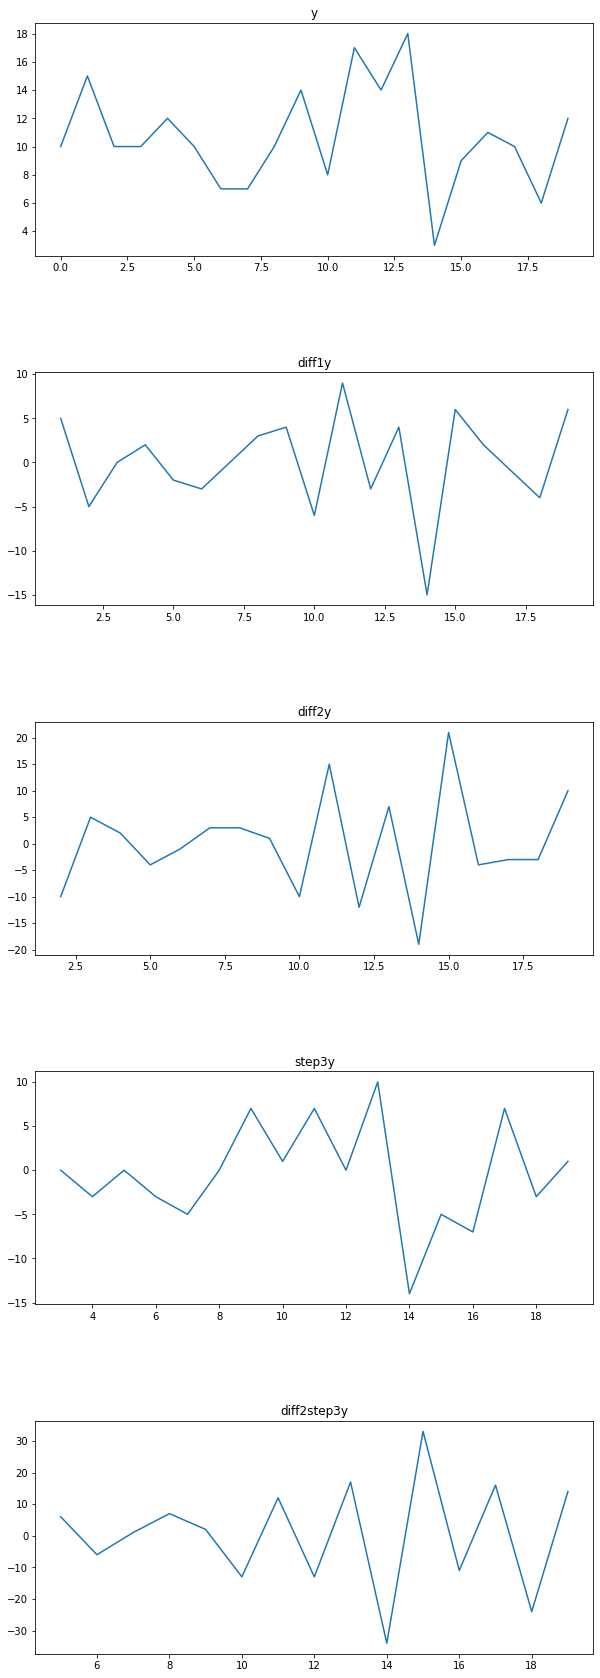

In [12]:
plt.figure(figsize=(10,30))
plt.subplots_adjust(hspace=0.5)
plt.subplot(5,1,1)
plt.plot(np.arange(len(y)),y,label='y')
plt.title('y')
plt.subplot(5,1,2)
plt.plot(np.arange(len(y)-len(diff1y),len(y)),diff1y,label='diff1y')
plt.title('diff1y')
plt.subplot(5,1,3)
plt.plot(np.arange(len(y)-len(diff2y),len(y)),diff2y,label='diff2y')
plt.title('diff2y')
plt.subplot(5,1,4)
plt.plot(np.arange(len(y)-len(step3y),len(y)),step3y,label='step3y')
plt.title('step3y')
plt.subplot(5,1,5)
plt.plot(np.arange(len(y)-len(diff2step3y),len(y)),diff2step3y,label='diff2step3y')
plt.title('diff2step3y')
plt.show()